# **Import Libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# **Read Data**

In [2]:
real_users = pd.read_json("/kaggle/input/instagram/realAccountData.json")
fake_users = pd.read_json("/kaggle/input/instagram/fakeAccountData.json")
fake_users.head()

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
0,25,1937,0,0,1,1,0,10,1
1,324,4122,0,0,1,0,4,15,1
2,15,399,0,0,0,0,3,12,1
3,14,107,0,1,1,0,1,10,1
4,264,4651,0,0,1,0,0,14,1


In [3]:
fake_users.describe()

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.0
mean,116.640000,1878.030000,11.980000,3.535000,0.605000,0.32500,1.635000,11.390000,1.0
std,289.906744,1871.377801,27.757558,28.585036,0.490077,0.46955,1.902597,3.532747,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,5.000000,1.0
25%,10.750000,278.000000,0.000000,0.000000,0.000000,0.00000,0.000000,9.000000,1.0
50%,29.500000,1446.500000,0.000000,0.000000,1.000000,0.00000,1.000000,11.000000,1.0
75%,102.500000,2505.500000,4.500000,1.000000,1.000000,1.00000,3.000000,13.000000,1.0
max,3208.000000,7497.000000,138.000000,396.000000,1.000000,1.00000,10.000000,30.000000,1.0


In [4]:
real_users.head()

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
0,258,238,0,0,1,0,0,10,0
1,263,482,30,29,1,1,0,8,0
2,51,78,9,0,1,1,0,10,0
3,297,480,22,25,1,1,2,9,0
4,113,242,0,95,1,1,0,10,0


In [5]:
real_users.describe()

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.0
mean,419.891348,516.138833,25.034205,68.473843,0.986922,0.724346,0.266600,11.070423,0.0
std,366.998029,517.709885,34.128111,113.963572,0.113668,0.447068,0.851721,2.877679,0.0
min,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0
25%,218.000000,267.000000,0.000000,8.000000,1.000000,0.000000,0.000000,9.000000,0.0
50%,345.000000,419.500000,12.000000,30.000000,1.000000,1.000000,0.000000,11.000000,0.0
75%,515.750000,614.000000,36.000000,78.750000,1.000000,1.000000,0.000000,13.000000,0.0
max,4492.000000,6640.000000,150.000000,1058.000000,1.000000,1.000000,7.000000,22.000000,0.0


# **I/O or X/Y data**

In [6]:
feature_columns_to_use=["userFollowerCount","userFollowingCount","userBiographyLength","userMediaCount","userHasProfilPic","userIsPrivate","usernameDigitCount","usernameLength"]
test_data = pd.concat([real_users[:],fake_users[:]],axis=0)
x=test_data[feature_columns_to_use].values
y=test_data["isFake"].values

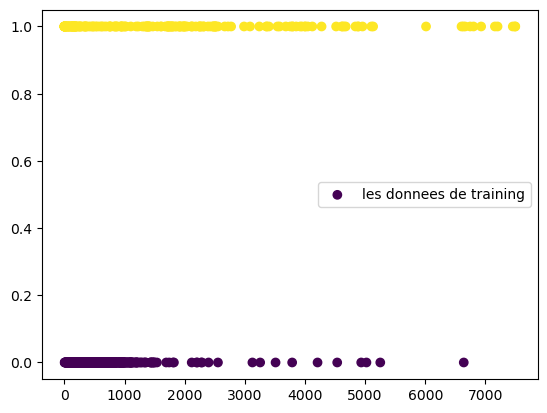

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x[:,1], y, c=y,label="les donnees de training")
plt.legend()

# **Split data to test and train**

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# **Install lazypredict library**

In [9]:
!pip install lazypredict

# **Create, train, test models**

In [10]:
from lazypredict.Supervised import LazyClassifier
reg = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 31%|███       | 9/29 [00:00<00:00, 20.35it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 55%|█████▌    | 16/29 [00:00<00:00, 23.08it/s]

NuSVC model failed to execute
specified nu is infeasible


 76%|███████▌  | 22/29 [00:01<00:00, 23.33it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [00:02<00:00, 13.75it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.98               0.96     0.96      0.98   
AdaBoostClassifier                 0.99               0.96     0.96      0.99   
LGBMClassifier                     0.98               0.95     0.95      0.98   
RandomForestClassifier             0.98               0.94     0.94      0.98   
DecisionTreeClassifier             0.97               0.94     0.94      0.97   
BaggingClassifier                  0.97               0.92     0.92      0.97   
SGDClassifier                      0.96               0.89     0.89      0.95   
ExtraTreesClassifier               0.96               0.89     0.89      0.96   
Perceptron                         0.93               0.88     0.88      0.93   
LogisticRegression                 0.95               0.87     0.87      0.95   
CalibratedClassifierCV      